In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [7]:
# Load the California Housing dataset
california_data = fetch_california_housing()

In [8]:
df = pd.DataFrame(california_data.data, columns=california_data.feature_names)
df['MedHouseValue'] = california_data.target

In [21]:
df.info

<bound method DataFrame.info of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       

In [10]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [20]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseValue'],
      dtype='object')

In [25]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


The dataset contains 20,640 samples with 8 input features and 1 target variable. Here's a brief description of each feature:

MedInc (Median Income): The median income of households within a block, measured in tens of thousands of US dollars.
HouseAge (Housing Average Age): The average age of houses within a block, measured in years.
AveRooms (Average Rooms): The average number of rooms in the houses within a block.
AveBedrms (Average Bedrooms): The average number of bedrooms in the houses within a block.
Population: The total population in a block.
AveOccup (Average Occupancy): The average number of people living in a house within a block.
Latitude: The geographic latitude of the block.
Longitude: The geographic longitude of the block.
The target variable is: MedHouseValue (Median House Value): The median house value for households within a block, measured in hundreds of thousands of US dollars.

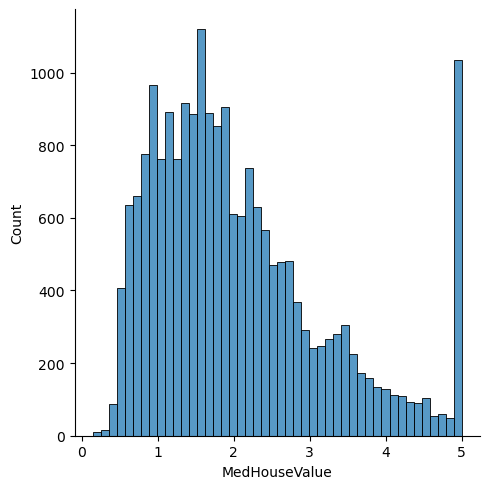

In [29]:
sns.displot(df['MedHouseValue'])

<AxesSubplot:>

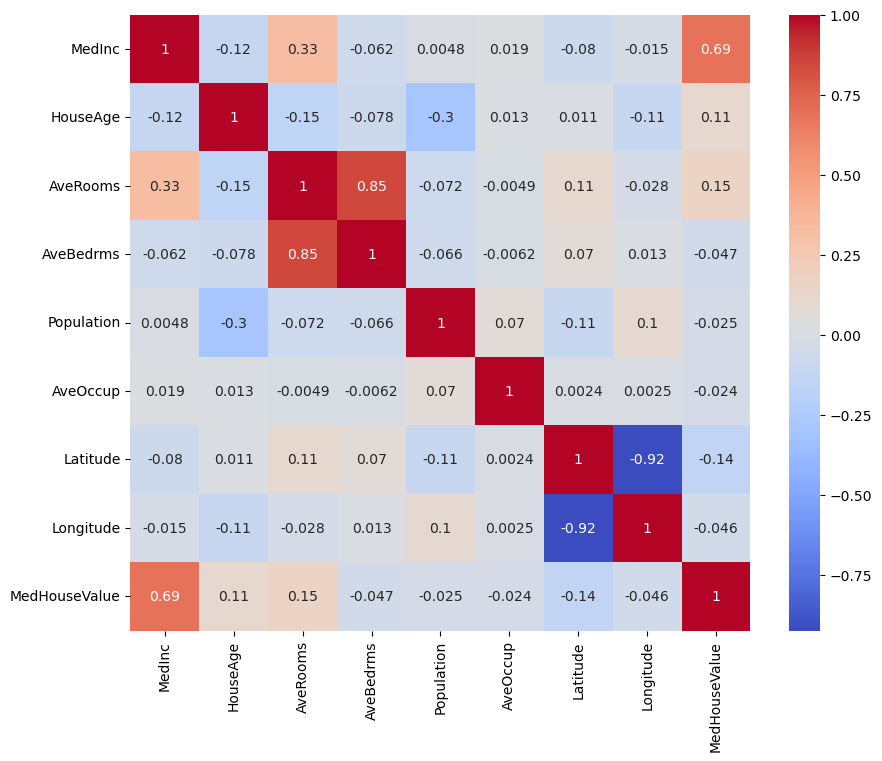

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [32]:
X = df.drop('MedHouseValue', axis=1)  # input features
# or 
# X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','Latitude', 'Longitude']]
y = df['MedHouseValue']  # target variable (median house value)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [33]:
lr_model.intercept_

-37.02327770606411

In [34]:
lr_model.coef_

array([ 4.48674910e-01,  9.72425752e-03, -1.23323343e-01,  7.83144907e-01,
       -2.02962058e-06, -3.52631849e-03, -4.19792487e-01, -4.33708065e-01])

In [35]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseValue'],
      dtype='object')

In [36]:
coef_df = pd.DataFrame(lr_model.coef_, X.columns, columns=["Coefficient"])

In [37]:
coef_df

,Coefficient
MedInc,0.448675
HouseAge,0.009724
AveRooms,-0.123323
AveBedrms,0.783145
Population,-0.000002
AveOccup,-0.003526
Latitude,-0.419792
Longitude,-0.433708


In [38]:
y_pred = lr_model.predict(X_test)

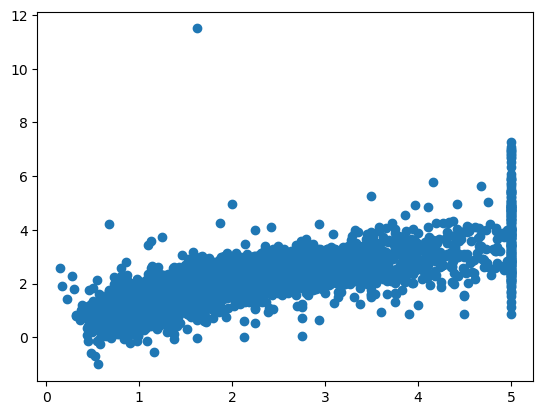

In [40]:
plt.scatter(y_test, y_pred)

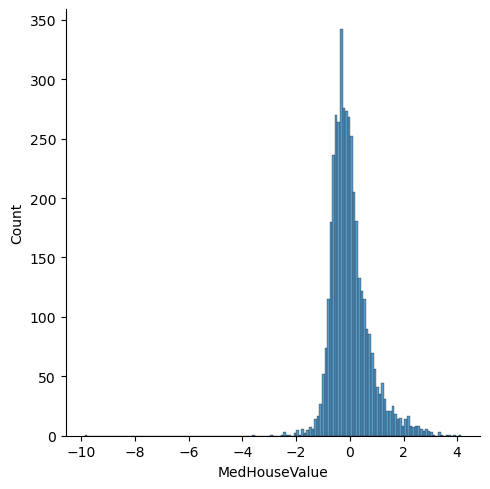

In [42]:
sns.displot(y_test - y_pred)

In [44]:
mean_absolute_error(y_test, y_pred)

0.5332001304956562

In [49]:
mse = mean_squared_error(y_test, y_pred)
mse

0.5558915986952443

In [50]:
np.sqrt(mse)

0.7455813830127763

In [51]:
r2 = r2_score(y_test, y_pred)
r2

0.5757877060324508